In [1]:
import atoti as tt


Welcome to Atoti 0.8.8!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [2]:
session = tt.Session()

In [20]:
products_table = session.read_csv("products.csv", keys=["Product"])

In [21]:
products_table.head()

,Category,Sub category,Size,Purchase price,Color,Brand
Product,,,,,,
BED_6,Furniture,Bed,King,375.0,white,Basic
HOO_14,Cloth,Hoodie,L,39.0,brown,Over
TAB_22,Furniture,Table,2m40,280.0,blue,Basic
TSH_30,Cloth,T-shirt,M,19.0,black,Over
SHO_38,Cloth,Shoes,9,44.0,red,Over


In [22]:
cube = session.create_cube(products_table)

In [23]:
h = cube.hierarchies
h

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x000002116227E930>, ('Products', 'Sub category'): <atoti.hierarchy.Hierarchy object at 0x000002116227EA50>, ('Products', 'Category'): <atoti.hierarchy.Hierarchy object at 0x000002116227EB10>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x000002116227EBD0>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x000002116227EC90>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x000002116227ED50>}

In [24]:
l = cube.levels

In [25]:
m = cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x0000021162276210>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x00000211622743B0>, 'Purchase price.SUM': <atoti.measure.Measure object at 0x0000021162277350>, 'Purchase price.MEAN': <atoti.measure.Measure object at 0x0000021162277470>}

In [28]:
cube.query(m["Purchase price.SUM"])

,Purchase price.SUM
0,"6,144.00"


In [29]:
cube.query(m["Purchase price.SUM"], levels=[l["Brand"]])

,Purchase price.SUM
Brand,
Basic,"2,844.00"
Mega,"2,667.00"
NewBrand,332.00
Over,301.00


In [31]:
cube.query(
    m["Purchase price.SUM"],
    filter=l["Brand"] == "Basic",
)

,Purchase price.SUM
0,"2,844.00"


In [32]:
cube.query(m["Purchase price.SUM"], levels=[l["Size"], l["Color"]])

Purchase price.SUM
Size   Color                   
10     black              46.00
       brown              46.00
       red                46.00
11     black              48.00
       brown              48.00
12     black              48.00
       white              48.00
1m80   black             190.00
       blue              190.00
       white             190.00
2m40   blue              280.00
       red               280.00
       white             280.00
7      black              40.00
       blue               40.00
       white              40.00
8      blue               42.00
       red                42.00
       white              42.00
9      blue               44.00
       brown              44.00
       red                44.00
Double black             252.00
       brown             252.00
       white             252.00
King   blue              375.00
       red               375.00
       white             375.00
L      black              59.00
       blue               20.00
       brown              39.00
       white              59.00
M      black              57.00
       brown              57.00
       red                38.00
       white              19.00
N/A    blue               48.00
       brown              48.00
       red                48.00
Queen  black             333.00
       blue              333.00
       white             333.00
S      black              18.00
       blue               35.00
       brown              53.00
       red                53.00
Single black             127.00
       brown             127.00
       red               127.00
XL     blue               21.00
       red                21.00
       white              21.00
XS     blue               17.00
       brown              17.00
       red                17.00

In [33]:
cube.query(
    m["Purchase price.SUM"],
    levels=[l["Size"], l["Color"]],
    filter=l["Brand"] == "Basic",
)

Purchase price.SUM
Size   Color                   
10     black              46.00
11     black              48.00
12     black              48.00
1m80   black             190.00
       blue              190.00
2m40   blue              280.00
7      white              40.00
8      white              42.00
Double brown             252.00
       white             252.00
King   red               375.00
       white             375.00
L      blue               20.00
       white              39.00
N/A    blue               48.00
       brown              48.00
Queen  white             333.00
S      blue               35.00
       red                18.00
Single brown             127.00
XL     blue               21.00
XS     red                17.00

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
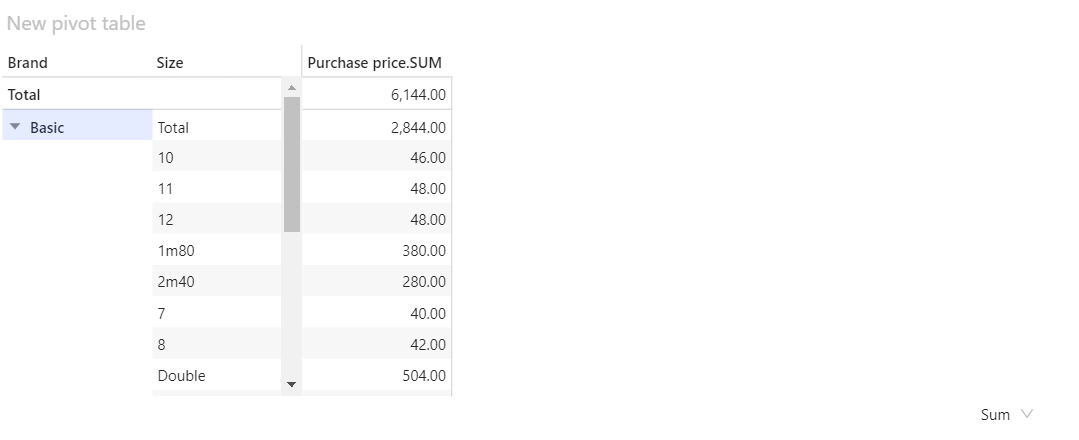

In [34]:
session.widget